In [1]:
library(Seurat)
library(SeuratDisk)
library(tidyverse)
library(ggplot2)
library(harmony)
library(patchwork)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




ERROR: Error in library(SeuratDisk): there is no package called ‘SeuratDisk’


In [ ]:
esc.AS <- readRDS("./RDS/esc_AS_remain_neg_1029.rds")
esc <- readRDS("./RDS/esc_total_1101.rds")

In [ ]:
esc.AS@meta.data <- esc.AS@meta.data %>% select(-curve1, -curve2, -curve3, -curve_mean)

# Remove negative cells

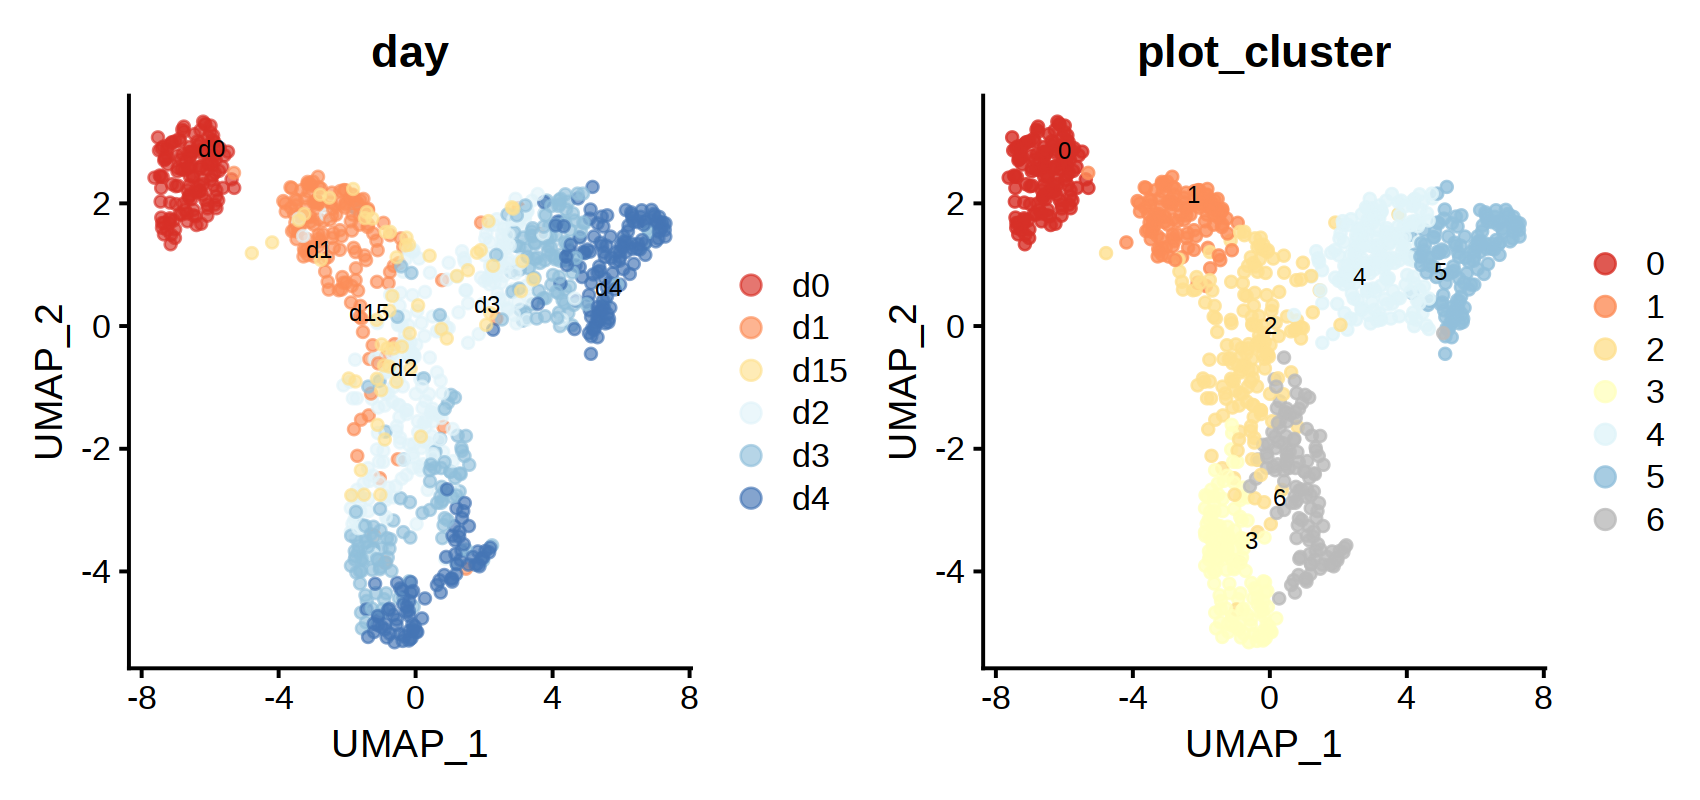

In [4]:
colors = c('#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4')
p1 <- DimPlot(esc.AS, reduction = "umap", group.by = 'day', label = T, pt.size = 1.5, label.size = 3,repel = T,cols=alpha(colors,0.66))
colors = c('#d73027','#fc8d59','#fee090','#ffffbf','#e0f3f8','#91bfdb','#bababa')
p2 <- DimPlot(esc.AS, reduction = "umap", group.by = 'plot_cluster', label = T, pt.size = 1.5, label.size = 3,repel = T,cols=alpha(colors,0.8))
options(repr.plot.width = 8.5,repr.plot.height=4, repr.plot.res = 200)
p1 | p2

In [5]:
esc.AS <- subset(esc.AS, plot_cluster!=6)

# re-analysis

In [6]:
esc.AS

An object of class Seurat 
2890 features across 904 samples within 2 assays 
Active assay: SCT (1104 features, 1104 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap

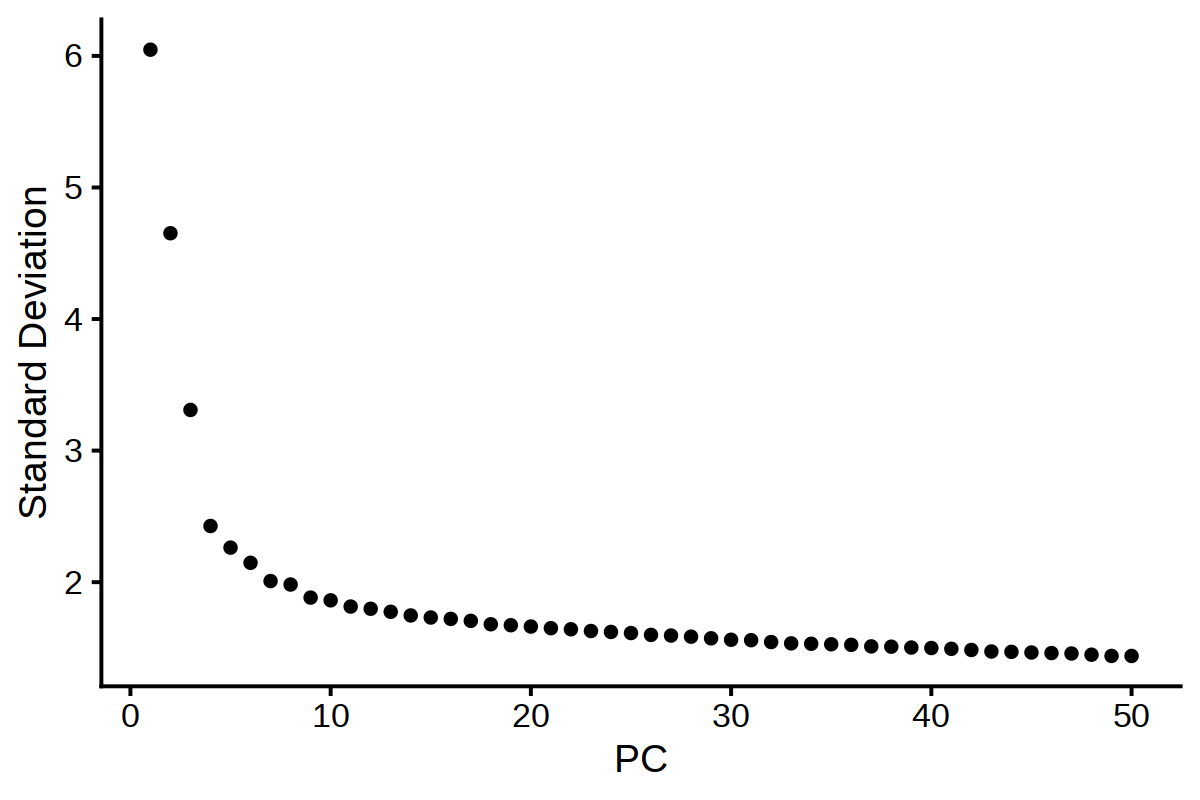

In [7]:
esc.AS <- SCTransform(esc.AS, vst.flavor = "v2", verbose = FALSE)
esc.AS <- RunPCA(esc.AS, verbose = FALSE)
options(repr.plot.width = 6,repr.plot.height = 4)
ElbowPlot(object = esc.AS, ndims = 50)

In [8]:
library(harmony)
set.seed(42)

In [9]:
esc.AS <- esc.AS %>% RunHarmony("sample3", assay.use="SCT")

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony converged after 5 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.SCT.harmony; see ?make.names for more details on syntax validity”


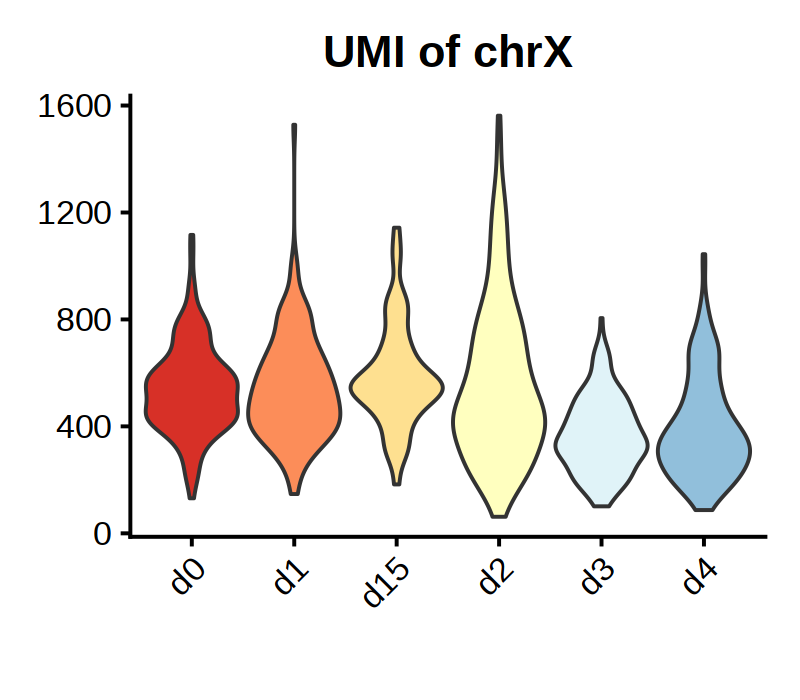

In [20]:
# violin plot of Xist and Tsix
options(repr.plot.width = 4,repr.plot.height = 3.5)
p1 <- VlnPlot(object = esc.AS, features = 'nCount_RNA', group.by = 'day',cols=alpha(colors,1), pt.size=0 ) + NoLegend() + xlab("") + ggtitle("UMI of chrX")
p1

In [12]:
esc.AS <- RunUMAP(esc.AS, dims = 1:35,n.neighbors=30, verbose = FALSE, reduction = "harmony", min.dist=0.30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


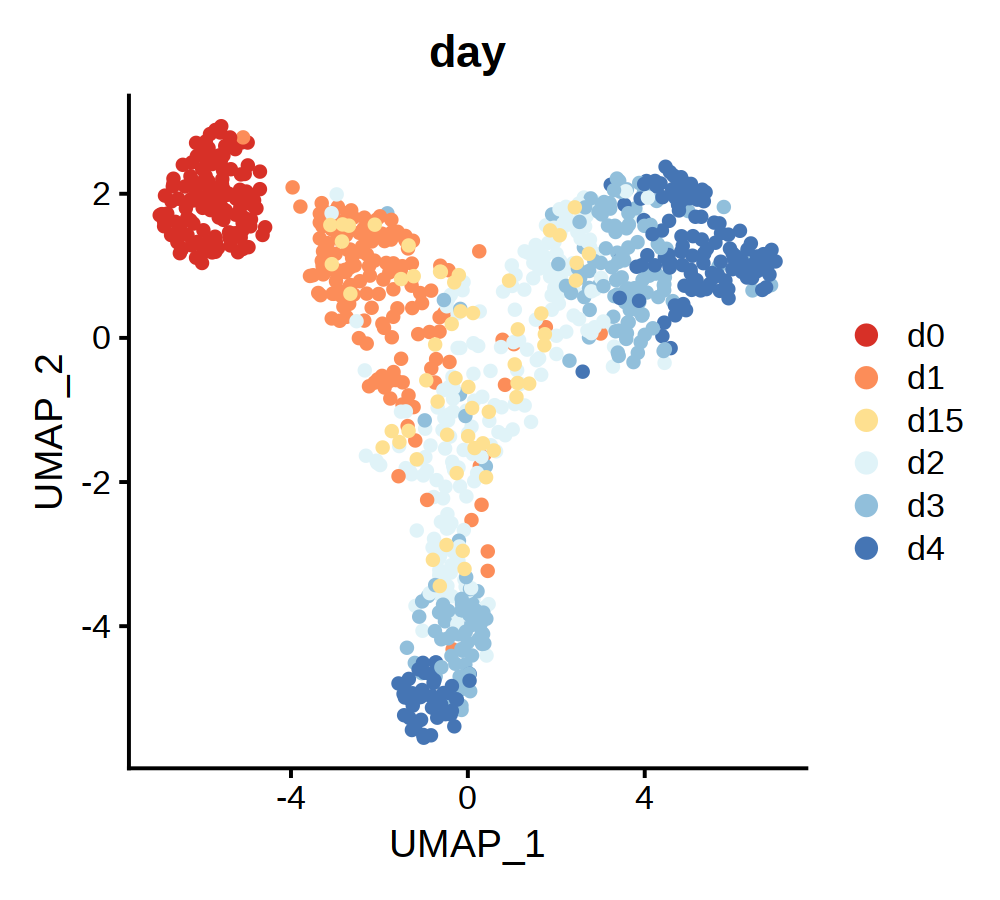

In [13]:
options(repr.plot.width = 5,repr.plot.height = 4.5)
colors = c('#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4')
p1 <- DimPlot(esc.AS, reduction = "umap", group.by = 'day', label = F, pt.size = 1.5, label.size = 5,repel = T,cols=alpha(colors,1))
p1

In [14]:
esc.AS <- FindNeighbors(esc.AS, reduction = "pca",dims = 1:35) %>% FindClusters(resolution = 1, verbose = FALSE)

Computing nearest neighbor graph



Computing SNN



In [15]:
esc.AS@meta.data$plot_cluster <- ifelse(esc.AS@meta.data$SCT_snn_res.1=="3","0",
                            ifelse(esc.AS@meta.data$SCT_snn_res.1=="5","1",
                            ifelse(esc.AS@meta.data$SCT_snn_res.1=="1","2",
                            ifelse(esc.AS@meta.data$SCT_snn_res.1=="4","3",
                            ifelse(esc.AS@meta.data$SCT_snn_res.1=="0","4","5")))))

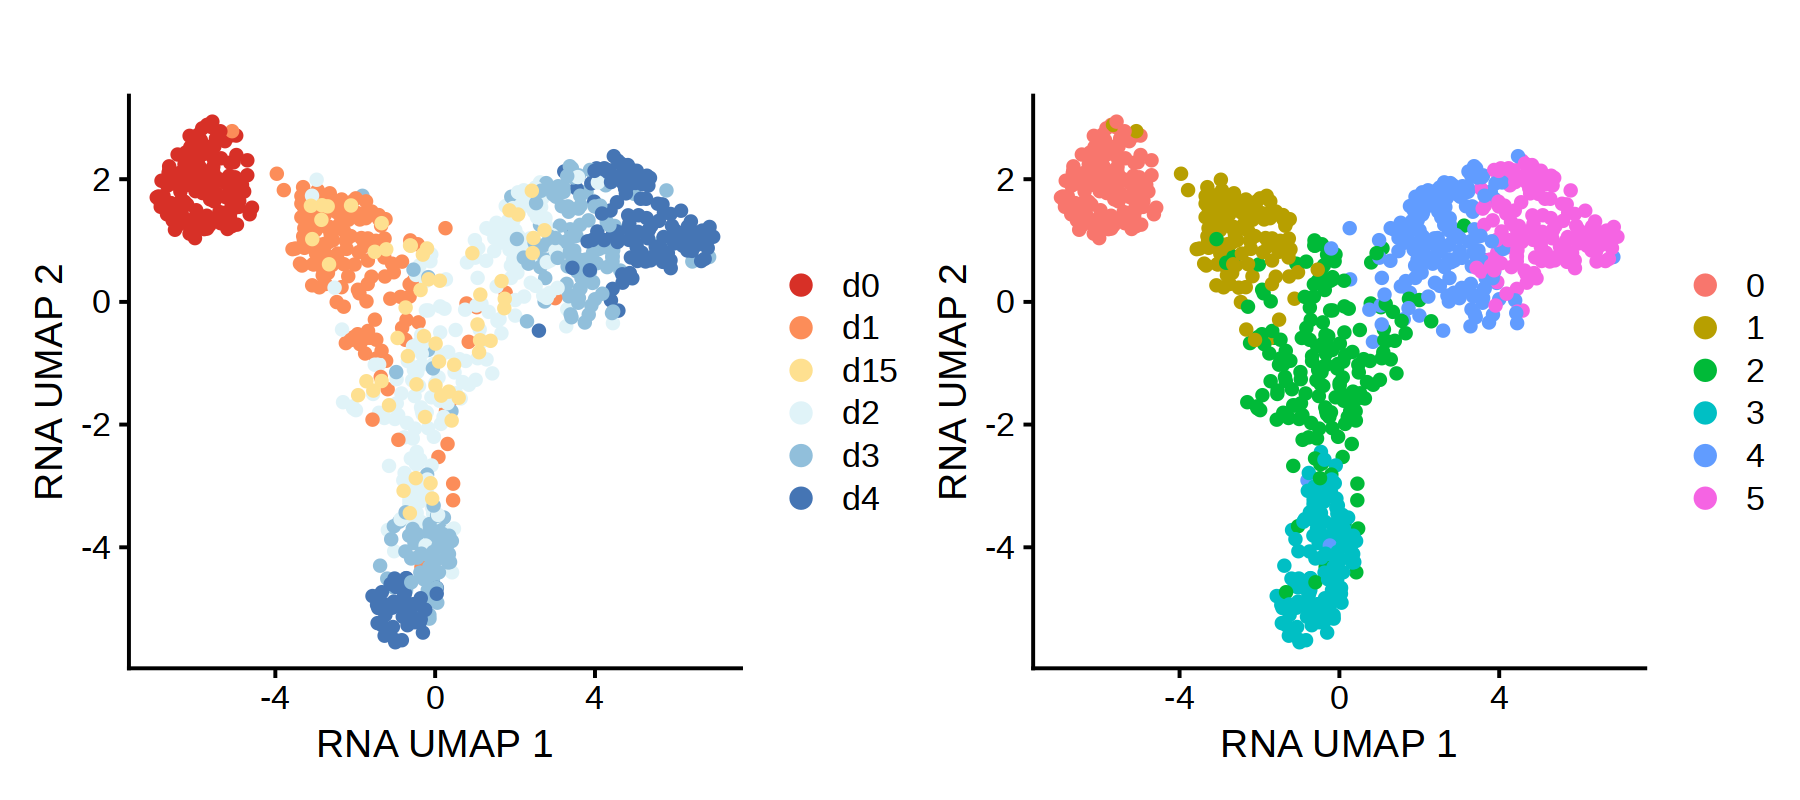

In [124]:
options(repr.plot.width = 9,repr.plot.height = 4)
colors = c('#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4')
p1 <- DimPlot(esc.AS, reduction = "umap", group.by = 'day', label = F, pt.size = 1.5, label.size = 5,repel = T,cols=alpha(colors,1)) + xlab("RNA UMAP 1") + ylab("RNA UMAP 2") + labs(title = "")
p2 <- DimPlot(esc.AS, reduction = "umap", group.by = 'plot_cluster', label = F, pt.size = 1.5, label.size = 5,repel = T) + xlab("RNA UMAP 1") + ylab("RNA UMAP 2") + labs(title = "")
p1 | p2

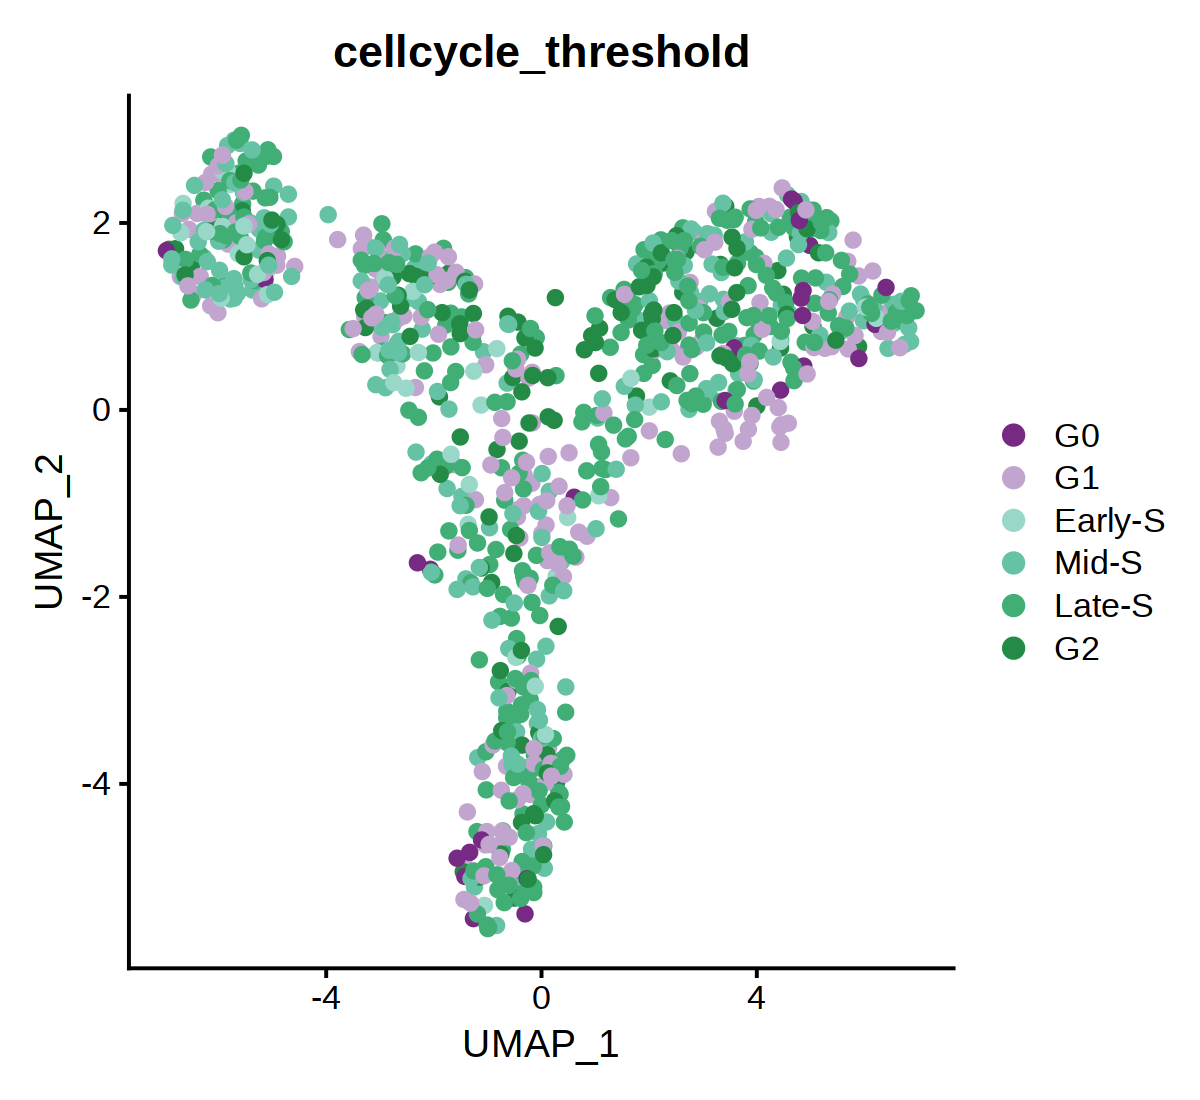

In [17]:
options(repr.plot.width = 6,repr.plot.height=5.5)
cellcyclecolors = c("G0"="#762a83","G1"="#c2a5cf","Early-S"="#99d8c9","Mid-S"="#66c2a4","Late-S"="#41ae76","G2"="#238b45","M"="#ea6e34","Unknown"="gray")
DimPlot(esc.AS, reduction = "umap", group.by = 'cellcycle_threshold', label = F, pt.size = 2, label.size = 3,repel = T,cols=alpha(cellcyclecolors,1))

`summarise()` has grouped output by 'plot_cluster'. You can override using the
`.groups` argument.


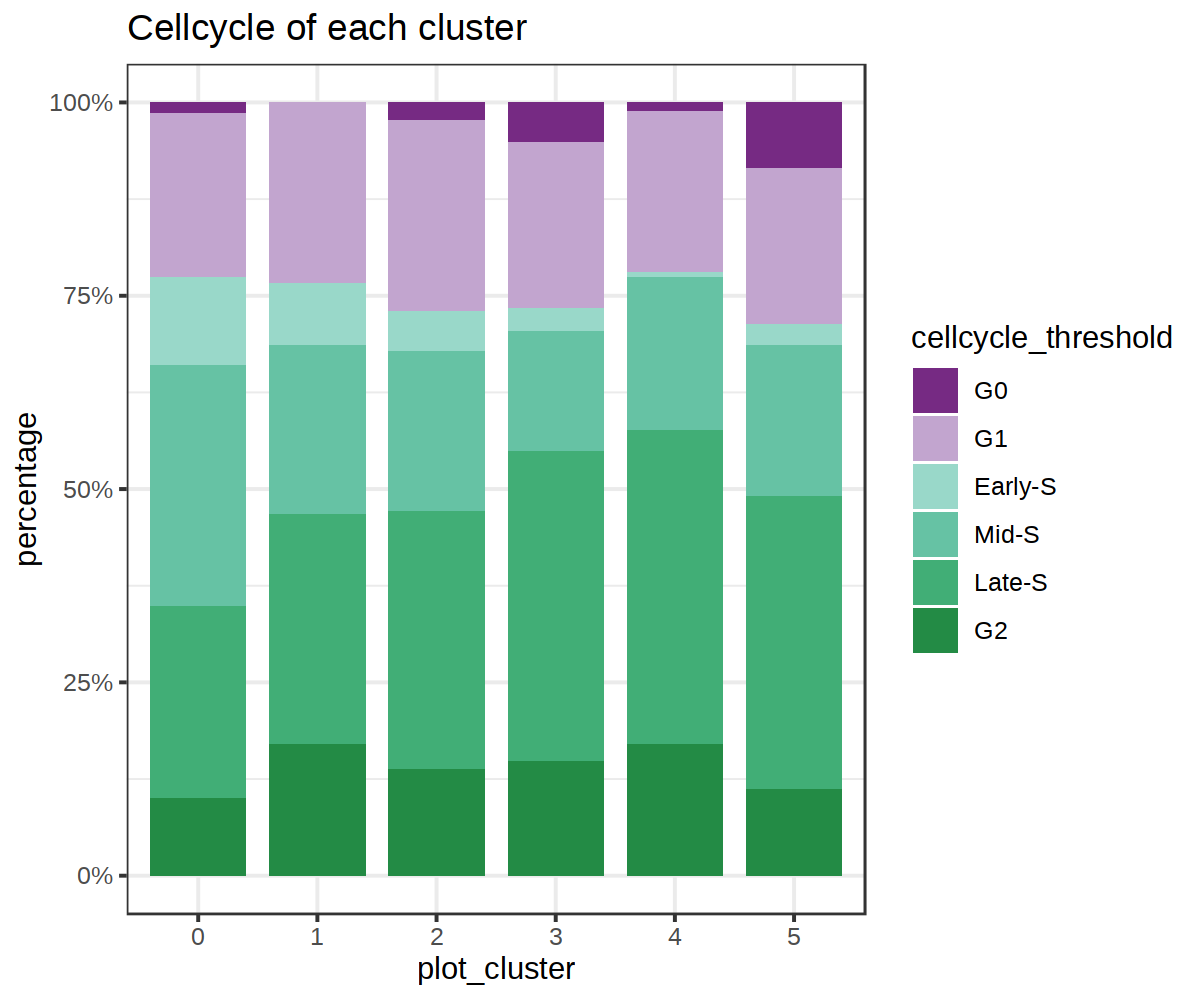

In [18]:
options(repr.plot.width=6, repr.plot.height=5)
cellcyclecolors = c("G0"="#762a83","G1"="#c2a5cf","Early-S"="#99d8c9","Mid-S"="#66c2a4","Late-S"="#41ae76","G2"="#238b45","M"="#ea6e34","Unknown"="gray")
esc.AS@meta.data$cellcycle_threshold <- factor(esc.AS@meta.data$cellcycle_threshold, levels=c("G0","G1","Early-S","Mid-S","Late-S","G2"))
esc.AS@meta.data %>% group_by(plot_cluster,cellcycle_threshold) %>% summarise(total=n()) %>% mutate(percentage=total/sum(total)) %>% 
    ggplot(aes(x=plot_cluster, y=percentage, fill=cellcycle_threshold)) + geom_bar(stat="identity",width=0.8) + 
    scale_fill_manual( values = cellcyclecolors) +
    scale_y_continuous(labels = scales::percent)+ theme_bw() + ggtitle("Cellcycle of each cluster")

`summarise()` has grouped output by 'plot_cluster'. You can override using the
`.groups` argument.


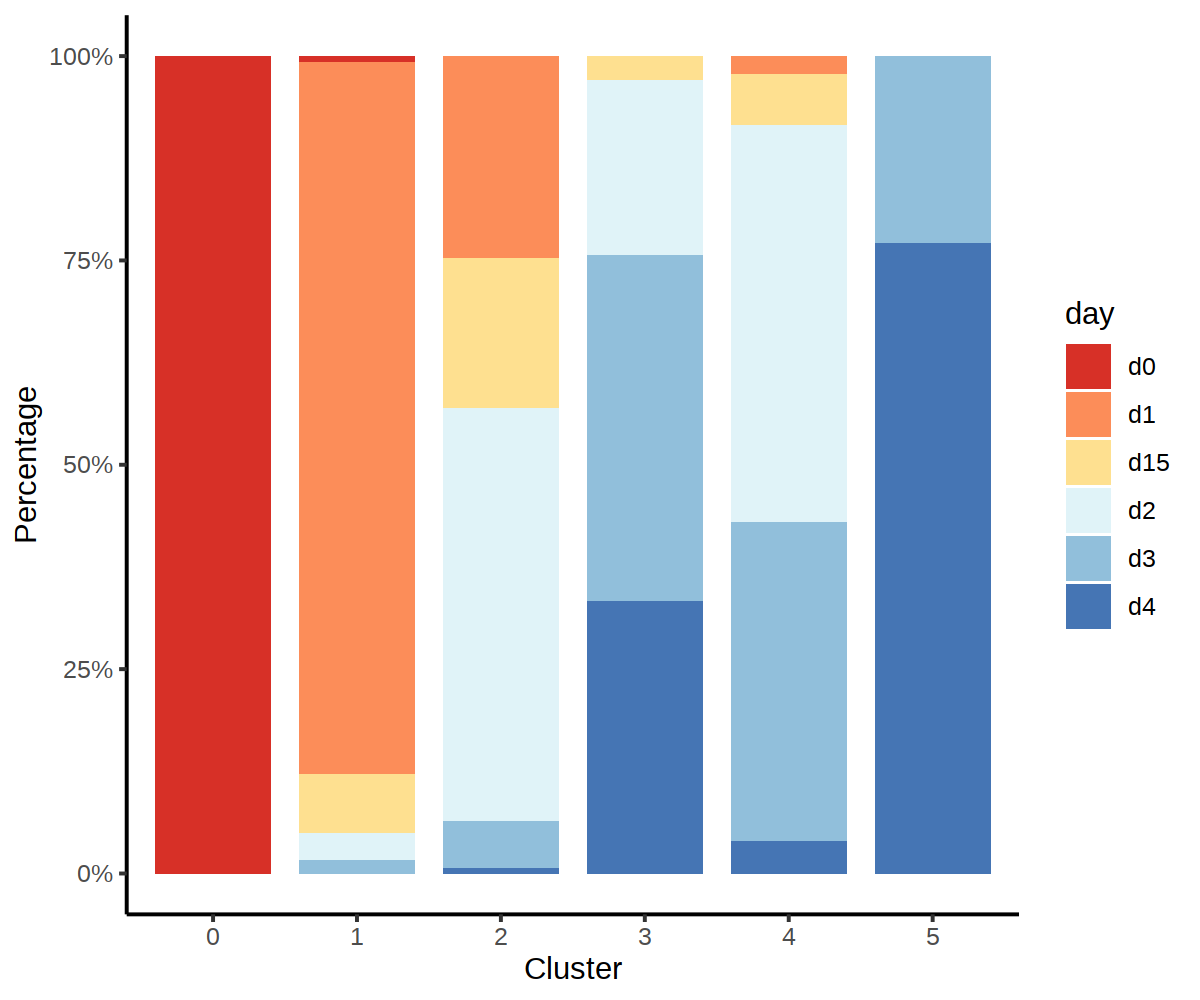

In [102]:
options(repr.plot.width=6, repr.plot.height=5)
colors = c('#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4')
esc.AS@meta.data %>% group_by(plot_cluster,day) %>% summarise(total=n()) %>% mutate(percentage=total/sum(total)) %>% 
    ggplot(aes(x=plot_cluster, y=percentage, fill=day)) + geom_bar(stat="identity",width=0.8) + 
    scale_fill_manual( values = colors) +
    scale_y_continuous(labels = scales::percent)+ theme_classic() +  xlab("Cluster") + ylab("Percentage")

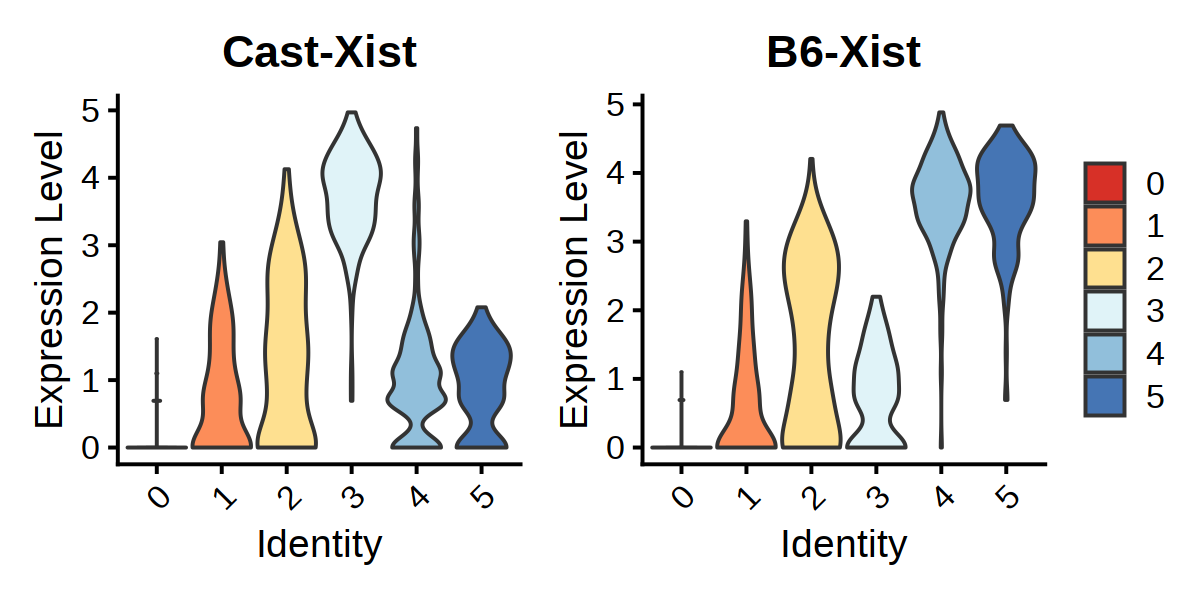

In [20]:
# violin plot of Xist and Tsix
options(repr.plot.width = 6,repr.plot.height = 3)
p1 <- VlnPlot(object = esc.AS, features = 'Cast-Xist', group.by = 'plot_cluster',cols=alpha(colors,1), pt.size=0 ) + NoLegend()
p2 <- VlnPlot(object = esc.AS, features = 'B6-Xist', group.by = 'plot_cluster',cols=alpha(colors,1), pt.size=0 )
p1 | p2

In [115]:
plot1 <- FeaturePlot(esc.AS, features = "B6-Xist", reduction = "umap", pt.size = 1) + xlab("RNA UMAP 1") + ylab("RNA UMAP 2")
plot2 <- FeaturePlot(esc.AS, features = "Cast-Xist", reduction = "umap", pt.size = 1)+ xlab("RNA UMAP 1") + ylab("RNA UMAP 2") 
plot3 <- FeaturePlot(esc.AS, features = "B6-Tsix", reduction = "umap", pt.size = 1) + xlab("RNA UMAP 1") + ylab("RNA UMAP 2")
plot4 <- FeaturePlot(esc.AS, features = "Cast-Tsix", reduction = "umap", pt.size = 1) + xlab("RNA UMAP 1") + ylab("RNA UMAP 2")

combined_plot <- (plot1 + plot2 + plot3 + plot4) + plot_layout(ncol = 4)

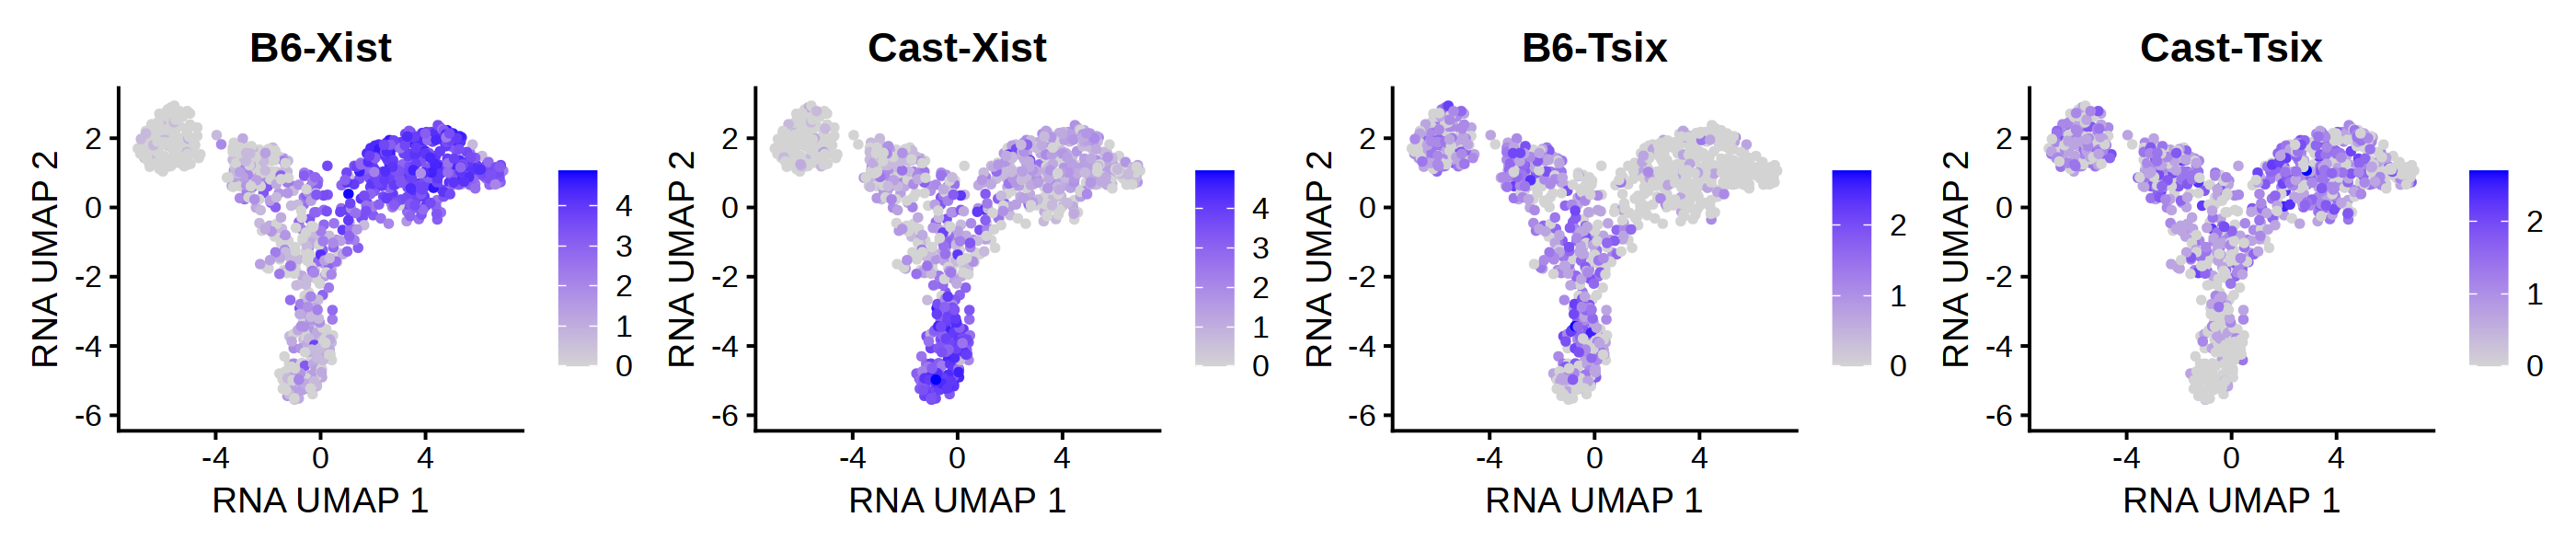

In [116]:
options(repr.plot.width = 14,repr.plot.height = 3)
combined_plot

# Monocle3

In [24]:
# library(dyno)
# library(tidyverse)
library(monocle3)
library(SeuratWrappers)

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCol

In [25]:
esc.AS

An object of class Seurat 
2839 features across 904 samples within 2 assays 
Active assay: SCT (1053 features, 1053 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap

In [26]:
esc.AS@reductions

$pca
A dimensional reduction object with key PC_ 
 Number of dimensions: 50 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: SCT 

$harmony
A dimensional reduction object with key harmony_ 
 Number of dimensions: 50 
 Projected dimensional reduction calculated:  TRUE 
 Jackstraw run: FALSE 
 Computed using assay: SCT 

$umap
A dimensional reduction object with key UMAP_ 
 Number of dimensions: 2 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: SCT 


In [27]:
cds <- as.cell_data_set(esc.AS)
# cds <- cluster_cells(cds, resolution=1e-3)

Warning message:
“Monocle 3 trajectories require cluster partitions, which Seurat does not calculate. Please run 'cluster_cells' on your cell_data_set object”


In [28]:
recreate.partitions <- c(rep(1, length(cds@colData@rownames)))
names(recreate.partitions) <- cds@colData@rownames
recreate.partitions <- as.factor(recreate.partitions)

cds@clusters@listData[["UMAP"]][["partitions"]] <- recreate.partitions

In [29]:
list.cluster <- esc.AS@active.ident

In [30]:
cds@int_colData@listData[["reducedDims"]][["UMAP"]] <- esc.AS@reductions[["umap"]]@cell.embeddings
cds@clusters@listData[["UMAP"]][["clusters"]] <- list.cluster

In [31]:
# colData(cds)$cluster <- esc.AS@meta.data$integrated_snn_res.1
# colData(cds)$partion <- esc.AS@meta.data$integrated_snn_res.1

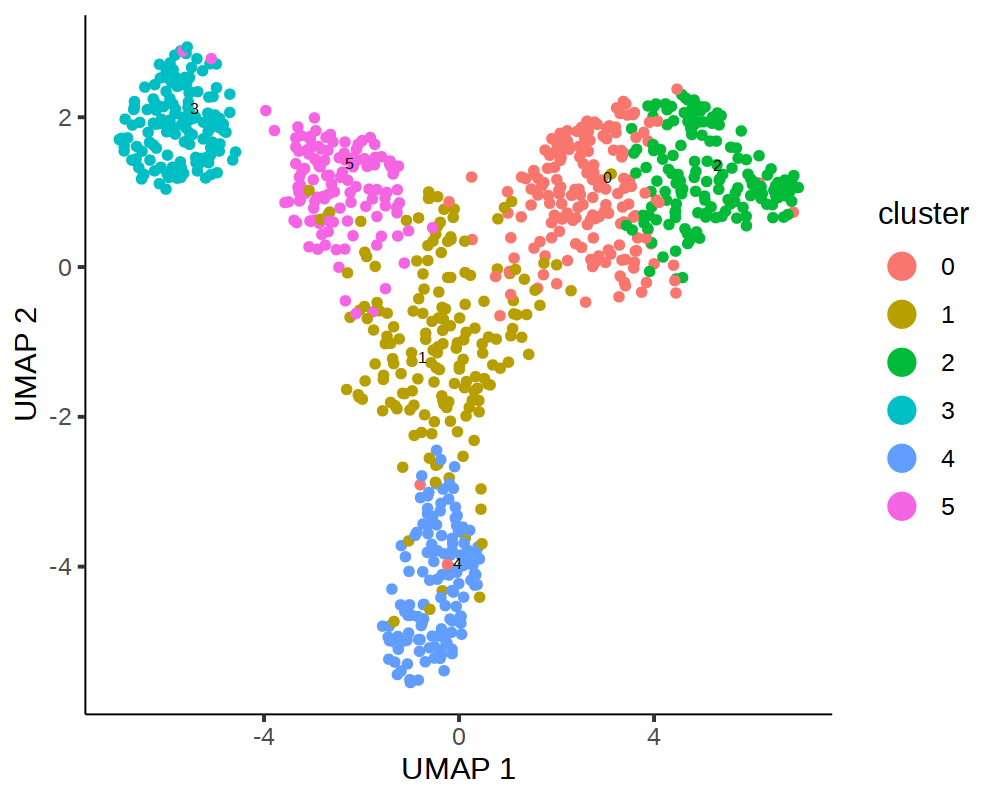

In [32]:
options(repr.plot.width = 5,repr.plot.height = 4)
p1 <- plot_cells(cds, color_cells_by = "cluster", reduction_method="UMAP",cell_size = 1,
 show_trajectory_graph = FALSE) + theme(legend.position = "right")
p1

In [33]:
cds <- learn_graph(cds, use_partition = F)

  |======================================================================| 100%


Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”


Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
ℹ Please use `select()` instead.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”


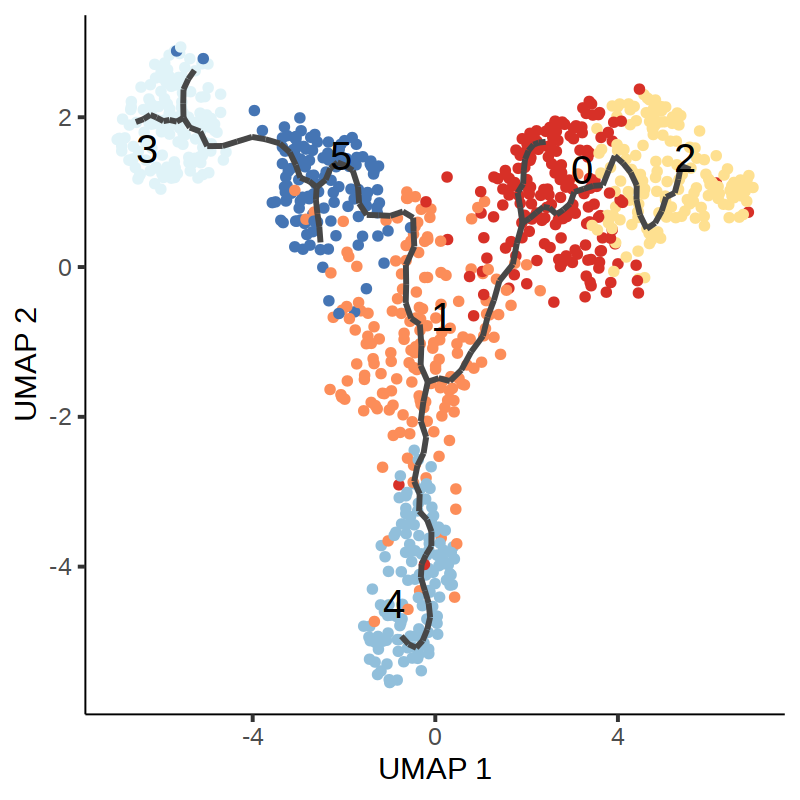

In [34]:
options(repr.plot.width = 4,repr.plot.height = 4)
plot_cells(cds, color_cells_by = "cluster", label_groups_by_cluster = T,
           label_branch_points = F, label_roots = T, label_leaves = F,cell_size = 1,
           group_label_size = 5) + scale_color_manual(values = colors)

Cells aren't colored in a way that allows them to be grouped.



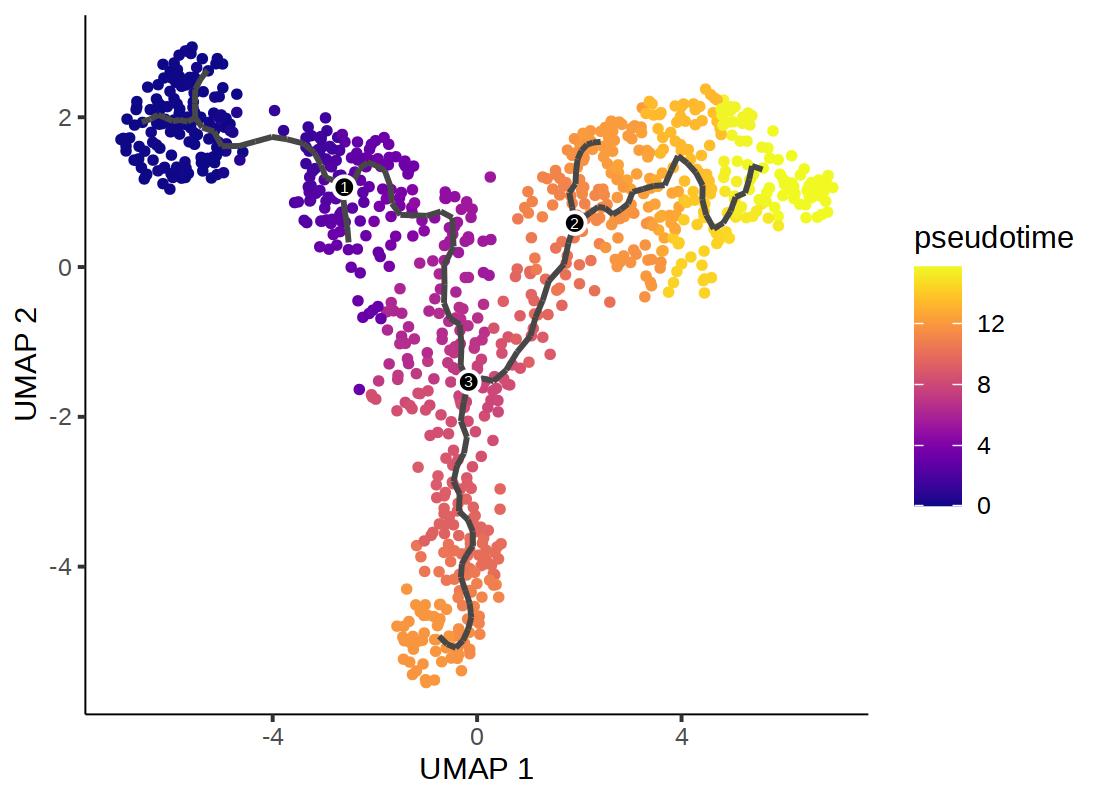

In [35]:
options(repr.plot.width = 5.5,repr.plot.height = 4)
cds <- order_cells(cds, reduction_method = "UMAP", root_cells = colnames(cds[, clusters(cds) == 3]))
plot_cells(cds, color_cells_by = "pseudotime", label_groups_by_cluster = T,cell_size = 1,labels_per_group = 5,
           label_branch_points = T, label_roots = F, label_leaves = F)

In [36]:
pseudotime_monocle3 <- pseudotime(cds) %>% as.data.frame()
names(pseudotime_monocle3) <- "pseudotime_monocle3"

In [37]:
esc.AS@meta.data <- esc.AS@meta.data %>% left_join(pseudotime_monocle3 %>% mutate(cellname = row.names(.))) %>% mutate(temp = cellname) %>% column_to_rownames("temp")

Joining with `by = join_by(cellname)`


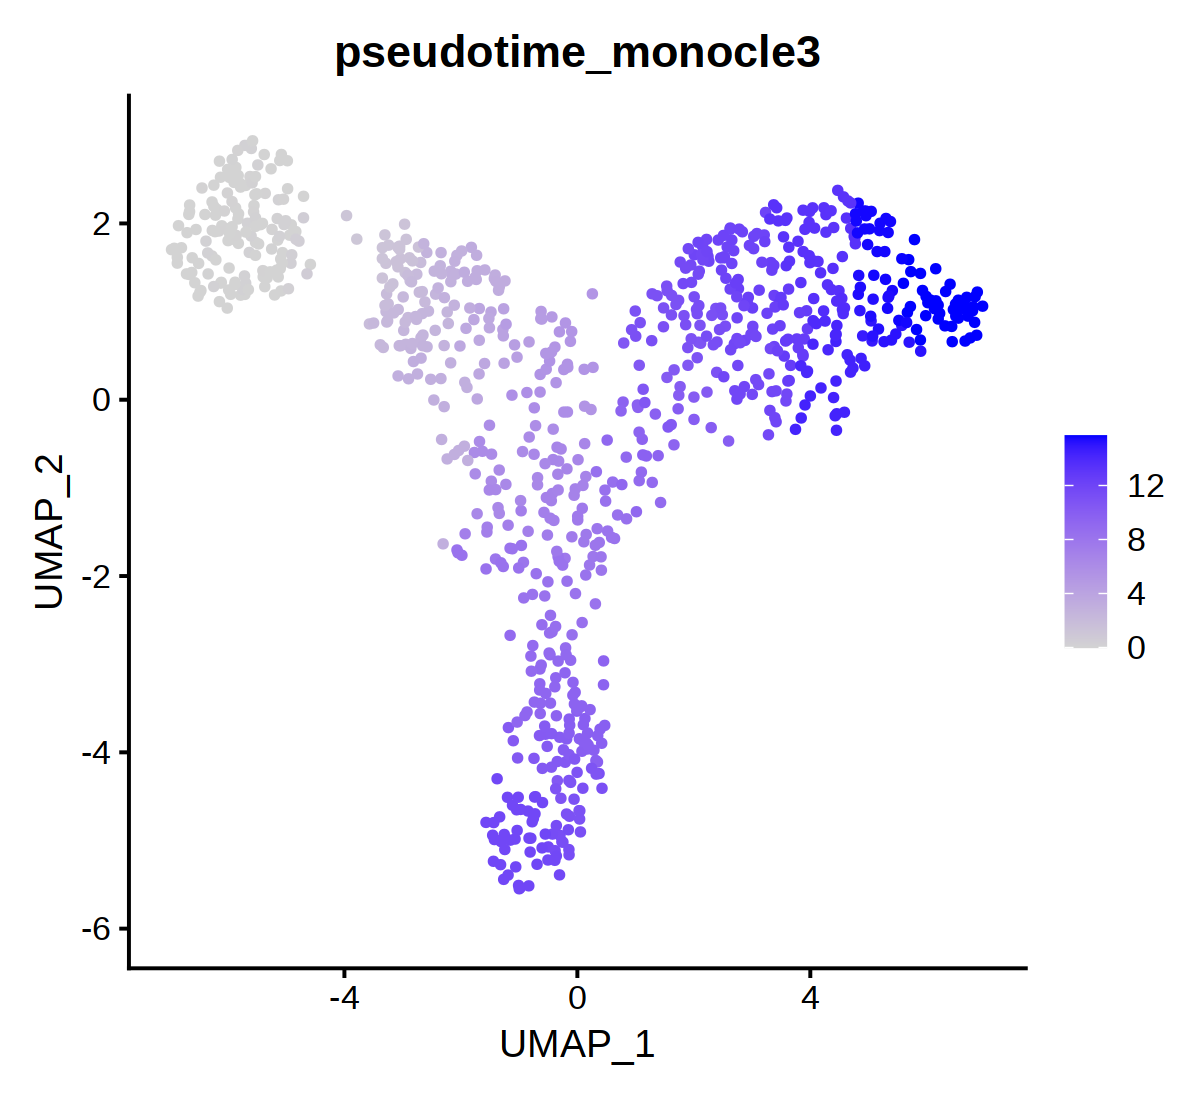

In [38]:
options(repr.plot.width = 6,repr.plot.height = 5.5)
FeaturePlot(esc.AS, "pseudotime_monocle3")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


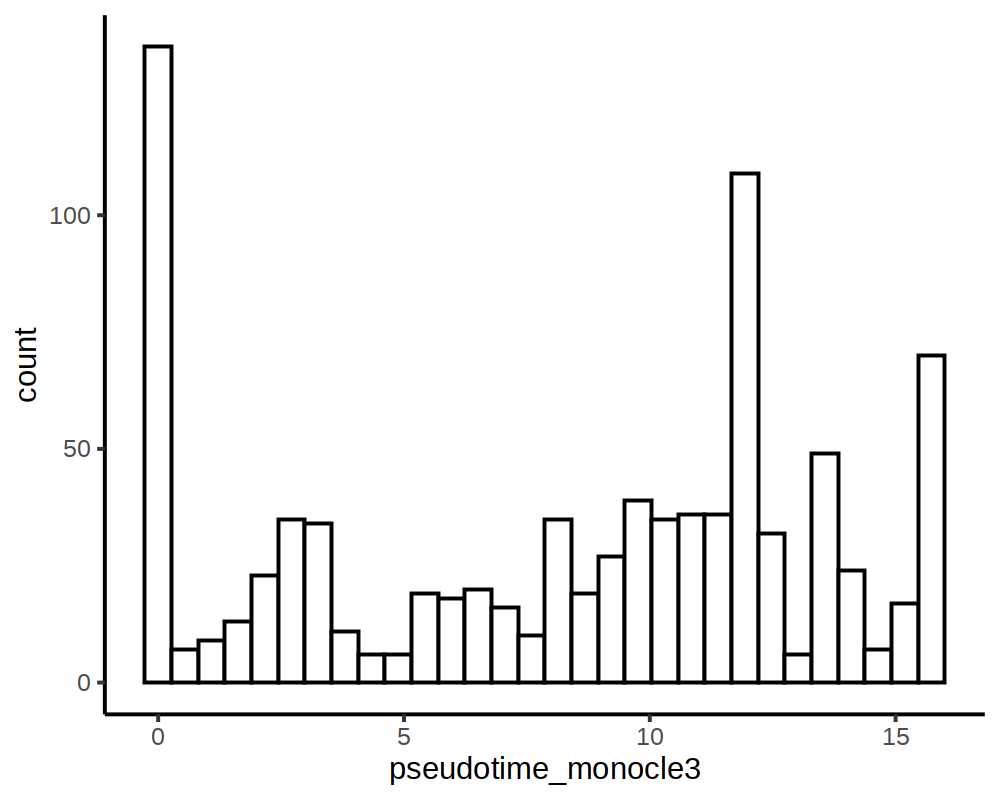

In [39]:
# ggplot2 直方图
options(repr.plot.width = 5,repr.plot.height = 4)
ggplot(esc.AS@meta.data, aes(pseudotime_monocle3)) + geom_histogram(color="black", fill="white") + theme_classic()

In [40]:
esc.AS

An object of class Seurat 
2839 features across 904 samples within 2 assays 
Active assay: SCT (1053 features, 1053 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap

# Slingshot

In [41]:
library(slingshot)

Loading required package: princurve



In [42]:
dimred <- esc.AS@reductions$pca@cell.embeddings
clustering <- esc.AS$SCT_snn_res.1
# counts <- as.matrix(esc.AS@assays$RNA@counts[esc.AS@assays$RNA@var.features, ])
# clustering <- factor(clustering, levels = c("0","5","4","1","3","6","2"))

In [43]:
lineages <- getLineages(data = dimred, clusterLabels = clustering, start.clus = '3', end.clus = c("2","4"), reducedDim = "umap")
lineages

Using full covariance matrix



class: SlingshotDataSet 

 Samples Dimensions
     904         50

lineages: 2 
Lineage1: 3  5  1  0  2  
Lineage2: 3  5  1  4  

curves: 0 

In [44]:
colors = c('#d73027','#fc8d59','#fee090','#ffffbf','#e0f3f8','#91bfdb')

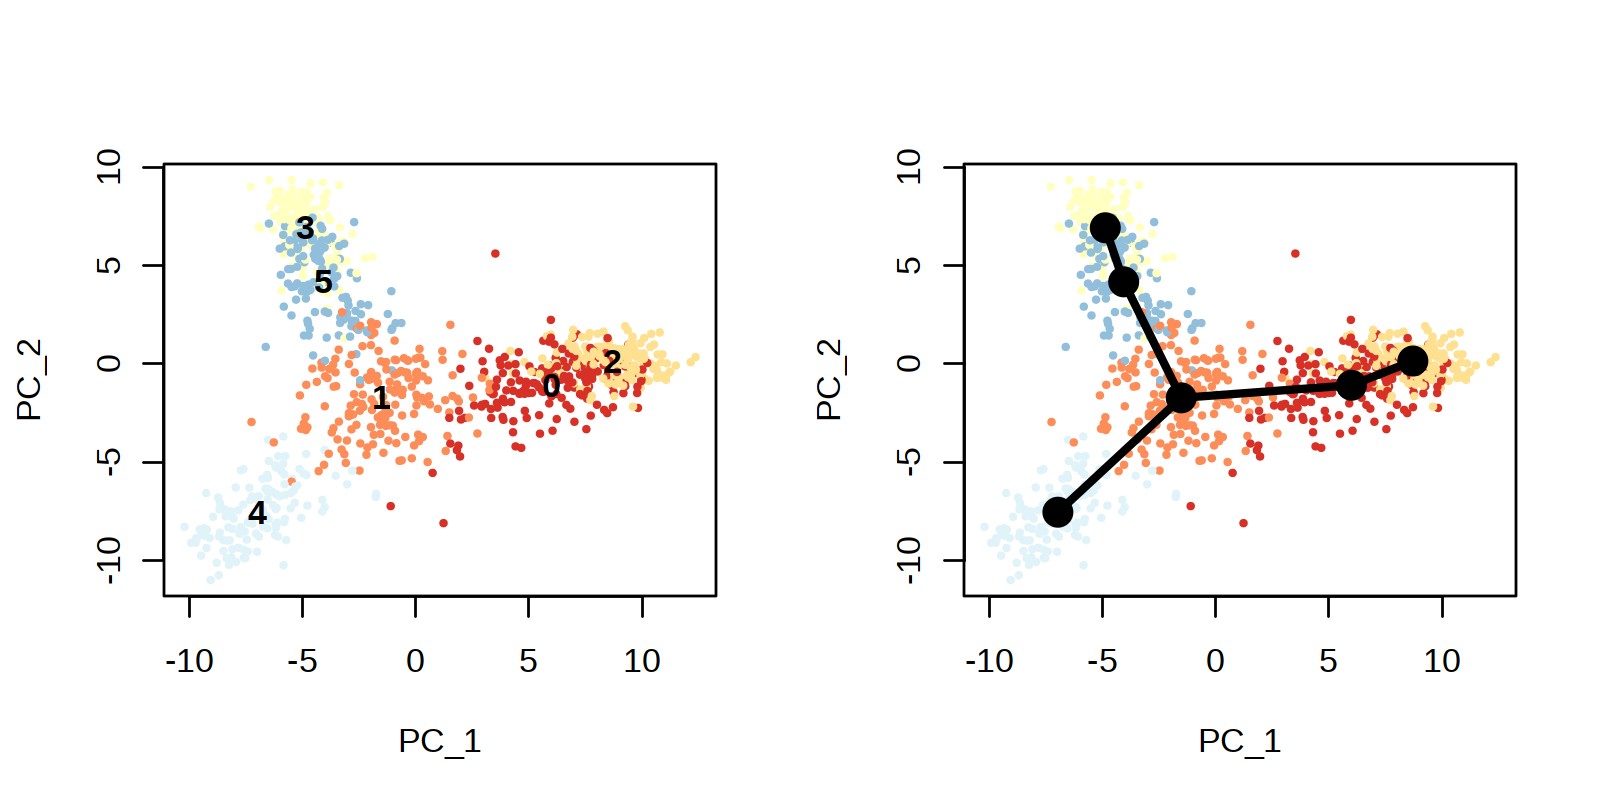

In [45]:
# Plot the lineages
options(repr.plot.width = 8,repr.plot.height = 4)
par(mfrow = c(1, 2))
plot(dimred[, 1:2], col = colors[clustering], cex = 0.5, pch = 16)
for (i in levels(clustering)) {
    text(mean(dimred[clustering == i, 1]), mean(dimred[clustering == i, 2]), labels = i, font = 2)
}
plot(dimred[, 1:2], col = colors[clustering], cex = 0.5, pch = 16)
lines(lineages, lwd = 3, col = "black")

In [46]:
curves <- getCurves(lineages)
curves

class: SlingshotDataSet 

 Samples Dimensions
     904         50

lineages: 2 
Lineage1: 3  5  1  0  2  
Lineage2: 3  5  1  4  

curves: 2 
Curve1: Length: 43.866	Samples: 754.16
Curve2: Length: 45.779	Samples: 572.14

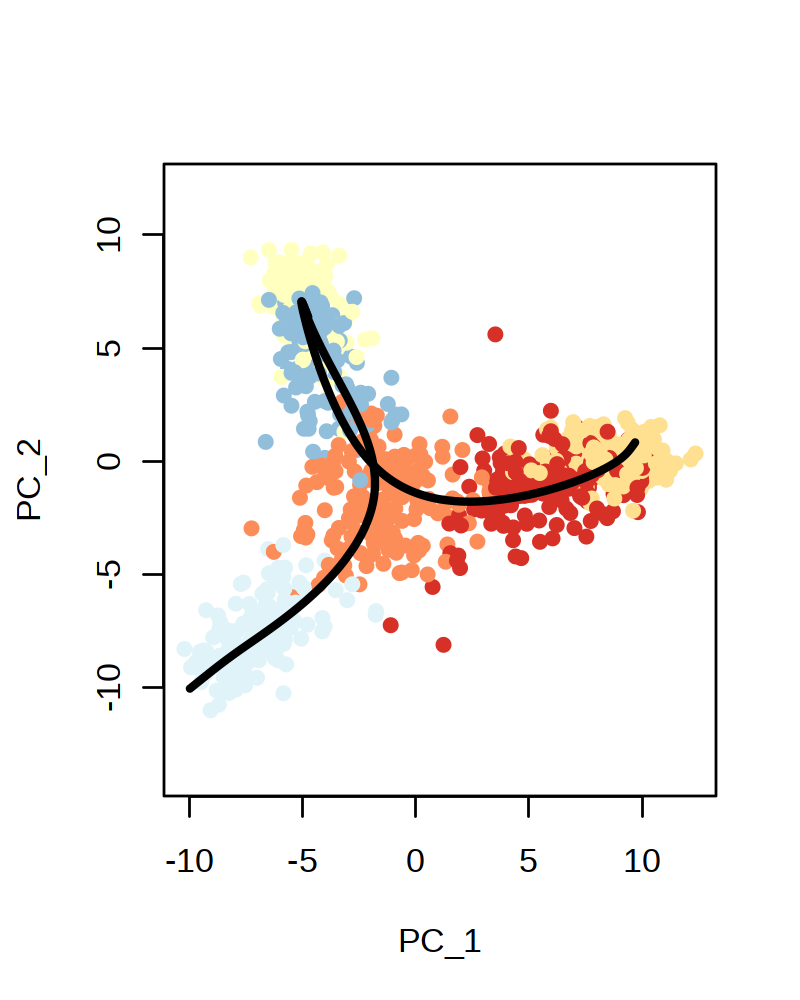

In [47]:
options(repr.plot.width = 4,repr.plot.height = 5)
plot(dimred, col = colors[clustering], asp = 1, pch = 16)
lines(curves, lwd = 3, col = "black")

In [51]:
df <- slingPseudotime(curves)
df <- data.frame(df) %>% rownames_to_column("cellname")
df

cellname,curve1,curve2
<chr>,<dbl>,<dbl>
d0A1,5.4468703,5.4454416
d0A10,5.5267384,5.5239293
d0A11,7.5753058,7.6029793
d0A12,3.3213180,3.3251909
d0A13,8.1175716,8.0981730
d0A14,3.3474426,3.3511973
d0A15,1.4795824,1.4801919
d0A16,4.7682407,4.7682009
d0A17,6.4229344,6.4147272


In [52]:
df$pseudotime_monocle3 <- esc.AS@meta.data$pseudotime_monocle3

In [53]:
esc.AS@meta.data <- esc.AS@meta.data %>% left_join(df %>% select(cellname,curve1,curve2), by = c("cellname")) %>% 
    column_to_rownames("cellname") %>% mutate(cellname = rownames(.))

Warning message:
“Removed 135 rows containing missing values (`geom_point()`).”


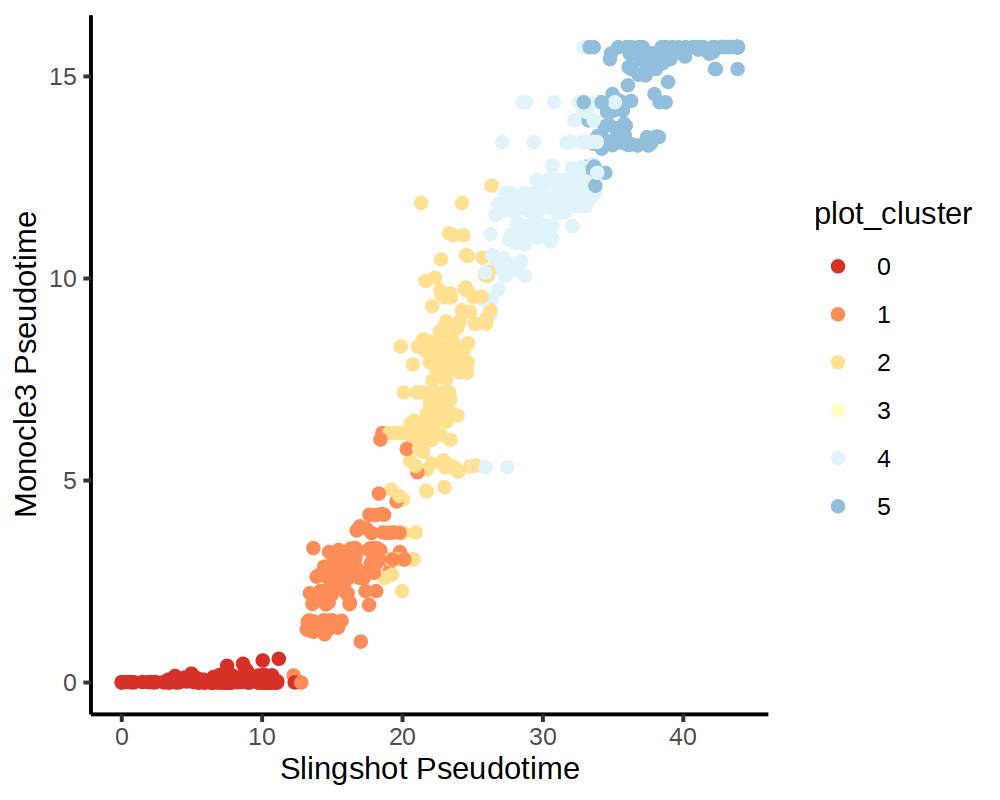

In [54]:
options(repr.plot.width = 5,repr.plot.height = 4)
# esc.AS@meta.data$SCT_snn_res.1.5 <- factor(esc.AS@meta.data$SCT_snn_res.1.5, levels=c("0","5","4","1","3","6","2"))
ggplot(esc.AS@meta.data, aes(x = curve1, y = pseudotime_monocle3, colour = plot_cluster)) +
  geom_point() +
  labs(x = "Slingshot Pseudotime", y = "Monocle3 Pseudotime") + theme_bw() + scale_color_manual(values = colors) + theme_classic()

Warning message:
“Removed 325 rows containing missing values (`geom_point()`).”


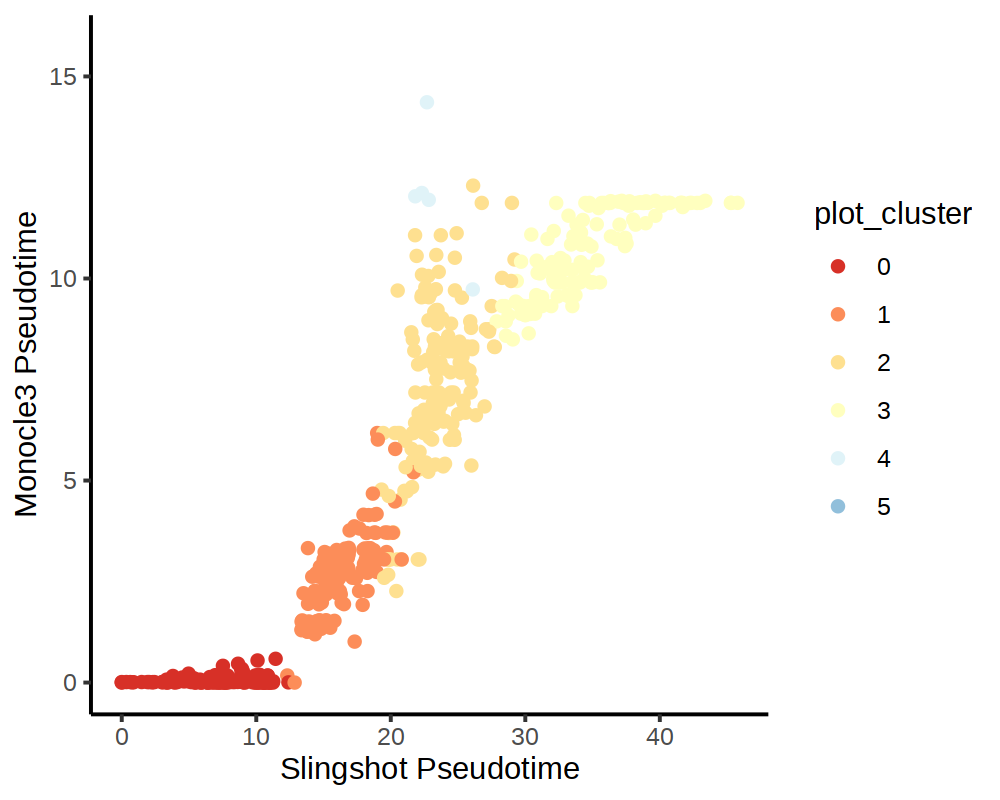

In [55]:
options(repr.plot.width = 5,repr.plot.height = 4)
# esc.AS@meta.data$SCT_snn_res.1.5 <- factor(esc.AS@meta.data$SCT_snn_res.1.5, levels=c("0","5","4","1","3","6","2"))
ggplot(esc.AS@meta.data, aes(x = curve2, y = pseudotime_monocle3, colour = plot_cluster)) +
  geom_point() +
  labs(x = "Slingshot Pseudotime", y = "Monocle3 Pseudotime") + theme_bw() + scale_color_manual(values = colors) + theme_classic()

In [56]:
library(RColorBrewer)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


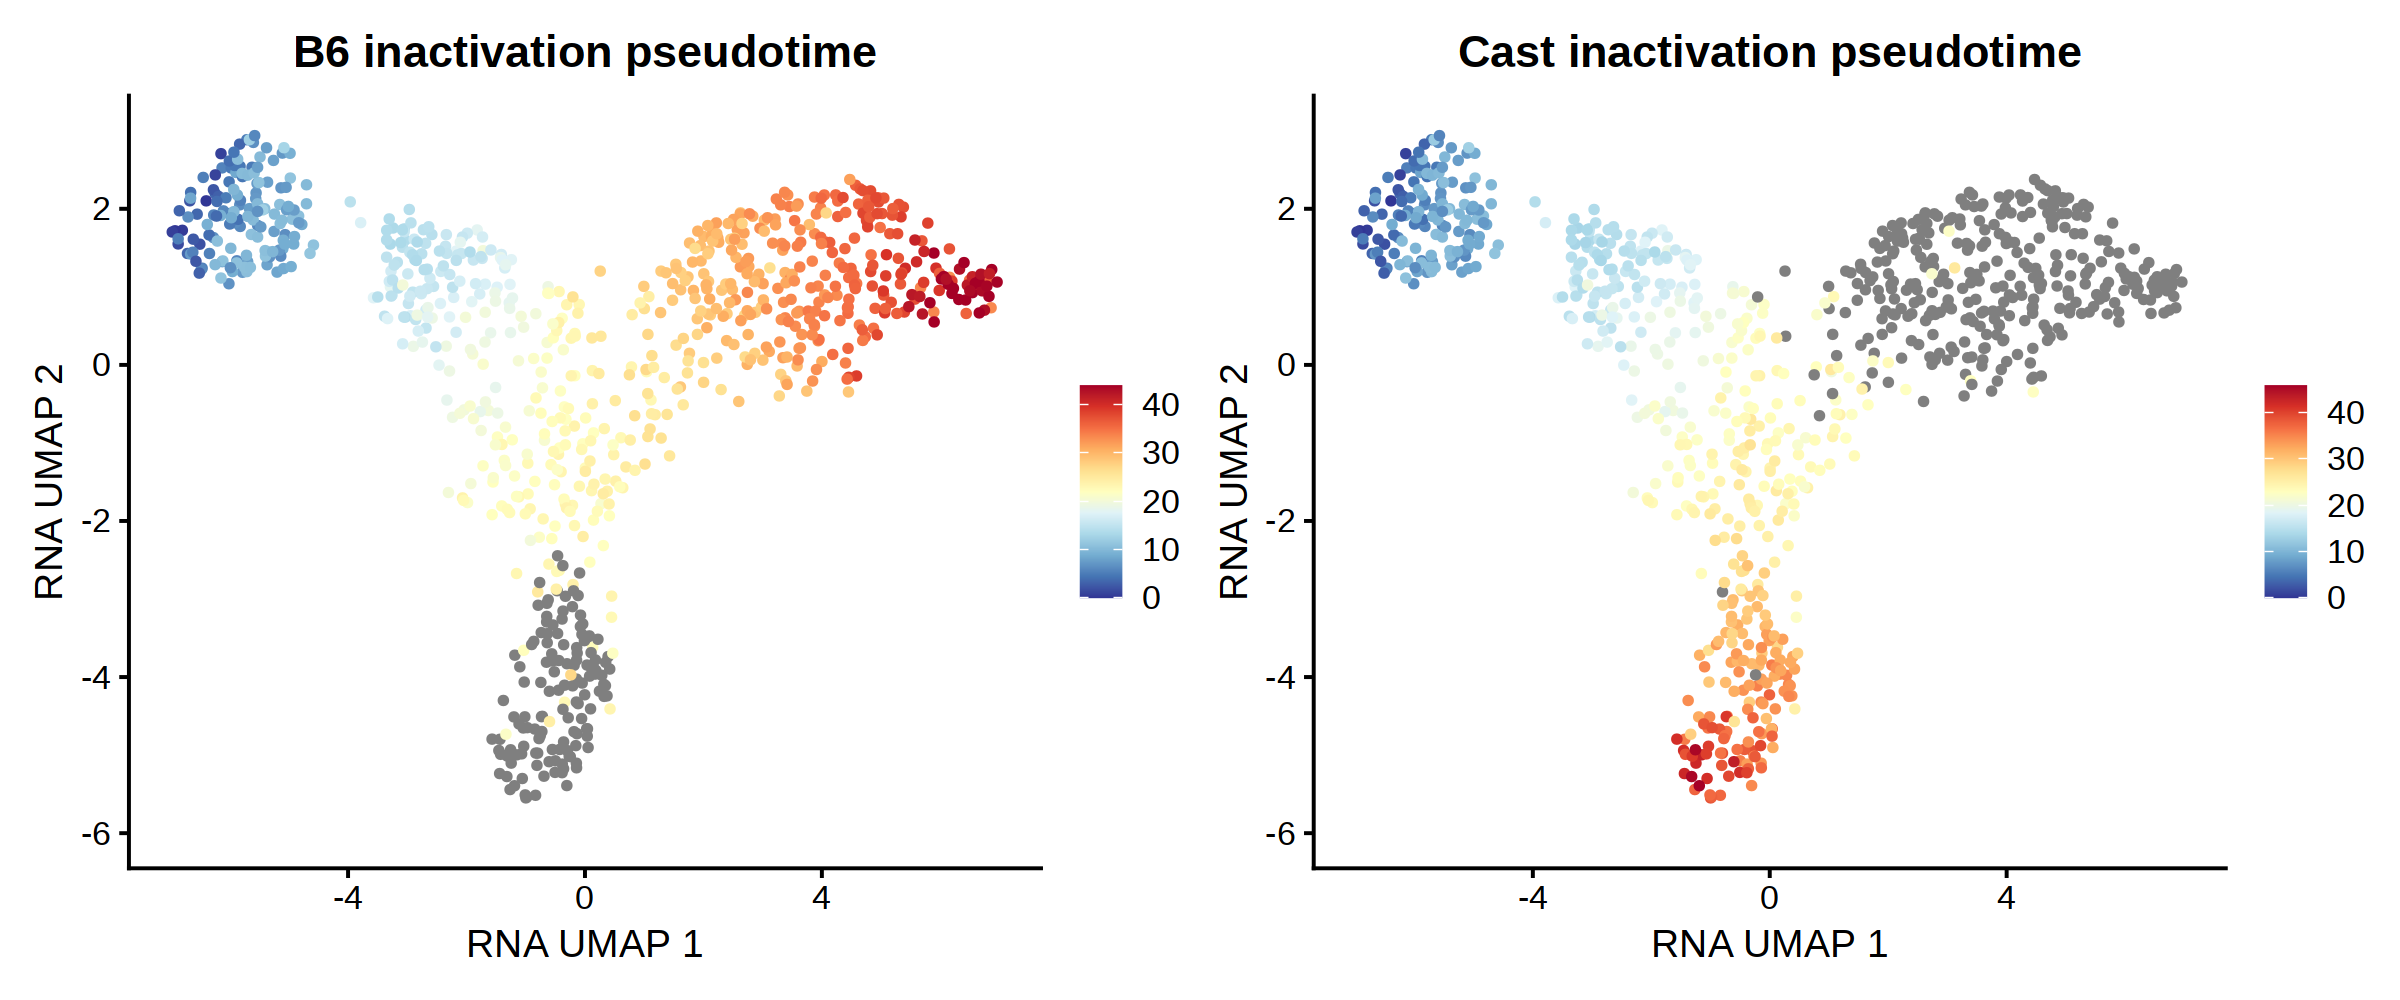

In [117]:
options(repr.plot.width = 12,repr.plot.height = 5)
p1 <- FeaturePlot(esc.AS, "curve1")+ scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdYlBu"))) + ggtitle("B6 inactivation pseudotime") + xlab("RNA UMAP 1") + ylab("RNA UMAP 2")
p2 <- FeaturePlot(esc.AS, "curve2")+ scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdYlBu"))) + ggtitle("Cast inactivation pseudotime")+ xlab("RNA UMAP 1") + ylab("RNA UMAP 2")
p1 | p2

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


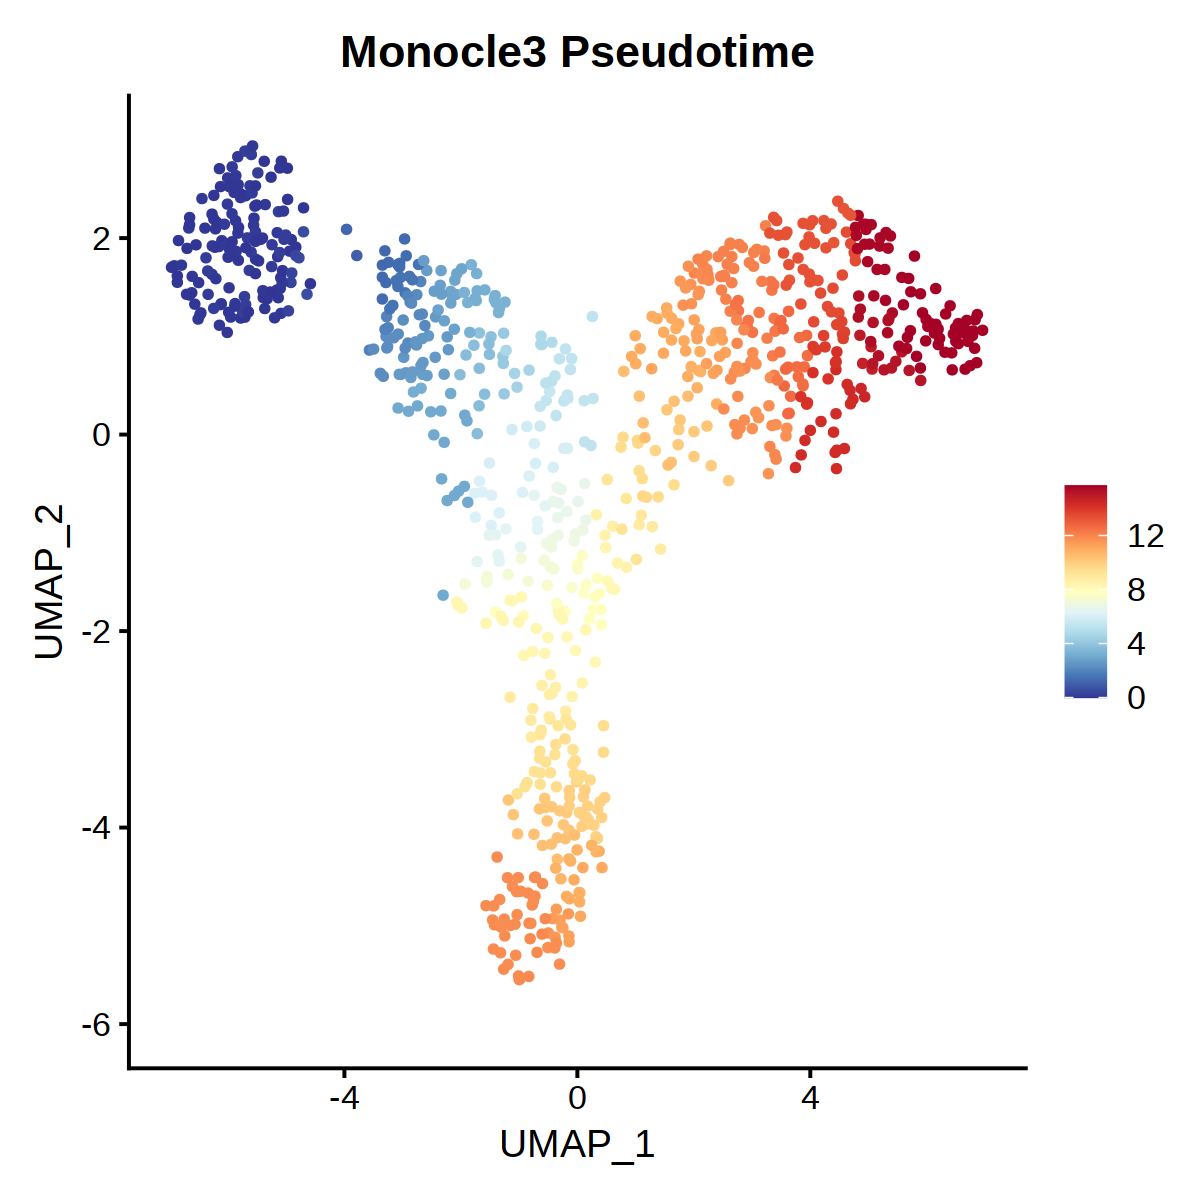

In [58]:
options(repr.plot.width = 6,repr.plot.height = 6)
FeaturePlot(esc.AS, "pseudotime_monocle3")+ scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdYlBu"))) + ggtitle("Monocle3 Pseudotime")

In [59]:
esc.AS

An object of class Seurat 
2839 features across 904 samples within 2 assays 
Active assay: SCT (1053 features, 1053 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap

In [60]:
esc.AS@meta.data %>% write.csv("s1014_metadata_X_noM_noXistneg.csv")

In [61]:
saveRDS(esc.AS, "./RDS/esc_AS_remove_neg_904.rds")

In [71]:
esc.AS@meta.data %>% pull(cellname) %>% write.table("./cellnames_1014.txt", col.names=F, row.names=F, quote = F)